In [1]:
# cargar librerias-----------------------------------------------
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import os  # No está en el pdf

from sklearn import datasets
import pandas as pd
import numpy as np
iris = datasets.load_iris()    # loading the dataset

iris.keys()

iris = pd.DataFrame(
    data = np.c_[iris['data'],
                 iris['target']],
    columns = iris['feature_names'] + ['target']
)

iris

# cargar dataset-------------------------------------------------
iris = load_iris()
# seleccionar longitud y anchura del petalo----------------------
X = iris.data[:, 2:]
# especie de la planta
y = iris.target
# crear el objeto de clase arbol---------------------------------
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=3)
# ajustar el arbol-----------------------------------------------
tree_clf.fit(X, y);

from graphviz import Source
from sklearn.tree import export_graphviz

# definir donde vamos a guardar la figura------------------------
ROOT_DIR = "."
PATH_FIGURAS = os.path.join(ROOT_DIR, "images")
os.makedirs(PATH_FIGURAS, exist_ok=True)

export_graphviz(
tree_clf,
out_file = os.path.join(PATH_FIGURAS, "arbol_iris.dot"),
feature_names = iris.feature_names[2:],
class_names = iris.target_names,
rounded = True,
filled = True
)

In [2]:
import os, sys
#EJERCICIO 1
# cargar librerias-----------------------------------------------
import pandas as pd
from sklearn.datasets import load_wine
# cargar dataset-------------------------------------------------
wine = load_wine(as_frame = True)
# ver variables predictoras wine---------------------------------
print(wine.data.info())
# ver variable respuesta-----------------------------------------
print(wine.target.value_counts())
from sklearn.tree import DecisionTreeClassifier
# seleccionar todas las variables--------------------------------
X = wine.data
# especie de la planta
y = wine.target
# crear el objeto de clase arbol---------------------------------
tree_clf = DecisionTreeClassifier(random_state = 3)
# ajustar el arbol-----------------------------------------------
tree_clf.fit(X, y);
# Ojo: pip install graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

# definir donde vamos a guardar la figura------------------------
ROOT_DIR = "."
PATH_FIGURAS = os.path.join(ROOT_DIR, "ejercicio08_images")
os.makedirs(PATH_FIGURAS, exist_ok=True)

export_graphviz(
        tree_clf,
        out_file = os.path.join(PATH_FIGURAS, "ejercicio08_arbol_wine.dot"),
        feature_names = wine.feature_names,
        class_names = wine.target_names,
        rounded = True,
        filled = True
    )
# crear el objeto de clase arbol fijando profundidad maxima a 3--
tree_clf_b = DecisionTreeClassifier(random_state=3, max_depth=3)
# ajustar el arbol-----------------------------------------------
tree_clf_b.fit(X, y);
# generar el .dot------------------------------------------------
export_graphviz(
        tree_clf_b,
        out_file = os.path.join(PATH_FIGURAS, "ejercicio08_arbol_wine_b.dot"),
        feature_names = wine.feature_names,
        class_names = wine.target_names,
        rounded = True,
        filled = True
    )
# crear el objeto de clase arbol fijando min_leaf a 4------------
tree_clf_c = DecisionTreeClassifier(random_state=3, 
min_samples_leaf=4)
# ajustar el arbol-----------------------------------------------
tree_clf_c.fit(X, y);
# generar el .dot------------------------------------------------
export_graphviz(
        tree_clf_c,
        out_file = os.path.join(PATH_FIGURAS, "ejercicio08_arbol_wine_c.dot"),
        feature_names = wine.feature_names,
        class_names = wine.target_names,
        rounded = True,
        filled = True
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
#EJERCICIO2
# cargar numpy---------------------------------------------------
import numpy as np
# definir semilla para que la particion sea la misma-------------
np.random.seed(3)
# definir funcion particiones------------------------------------
def particiones(target, dataset, test_part):
    test_part_size = int(len(dataset) * test_part)
    mezclar_indices = np.random.permutation(len(dataset))
    test_indices = mezclar_indices[:test_part_size]
    train_indices = mezclar_indices[test_part_size:]
    return dataset.iloc[train_indices], dataset.iloc[test_indices], target.iloc[train_indices], target.iloc[test_indices]
# usar funcion particiones con test_part 0.28---------------------
X_train, X_test, y_train, y_test = particiones(wine.target, 
wine.data, 0.281)

# cargar librerias-----------------------------------------------
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# crear objeto de la clase BaggingClassifier---------------------
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), n_estimators = 500,
    max_samples = 75, bootstrap=True, random_state = 3);

# ajustar el modelo----------------------------------------------
bag_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred = bag_clf.predict(X_test)

# comprobar resultados-------------------------------------------
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# crear objeto de la clase BaggingClassifier---------------------
pas_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), n_estimators = 500,
    max_samples = 75, bootstrap=False, random_state = 3);

# ajustar el modelo----------------------------------------------
pas_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_pas = pas_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print(accuracy_score(y_test, y_pred_pas))


# cargar librerias-----------------------------------------------
from sklearn.ensemble import RandomForestClassifier

# crear objeto de la clase RandomForestClassifier----------------
rnd_clf = RandomForestClassifier(n_estimators = 500, 
max_leaf_nodes = 4, random_state = 3, max_samples = 75);

# ajustar el modelo----------------------------------------------
rnd_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_rf = rnd_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print(accuracy_score(y_test, y_pred_rf))


# comparar con los resultados de un arbol de decision------------
tree_clf = DecisionTreeClassifier(random_state = 3, max_depth = 3);
tree_clf.fit(X_train, y_train);
y_pred_tree = tree_clf.predict(X_test);
print(accuracy_score(y_test, y_pred_tree))

0.94
0.94
0.96
0.9


0.94


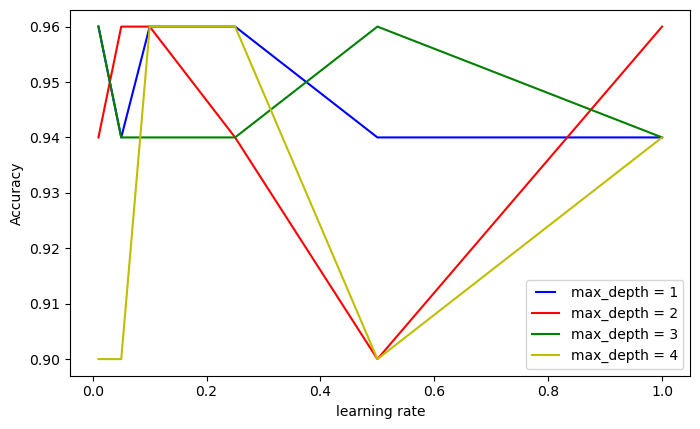

In [7]:
#EJERCICIO3
# cargar librerias-----------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
# crear objeto de la clase BaggingClassifier---------------------
gb_clf = GradientBoostingClassifier(n_estimators = 500,
random_state = 3);

# ajustar el modelo----------------------------------------------
gb_clf.fit(X_train, y_train);

# obtener estimaciones del modelo sobre la muestra de test-------
y_pred_gb = gb_clf.predict(X_test);

# comprobar resultados-------------------------------------------
print(accuracy_score(y_test, y_pred_gb))
# crear un conjunto de posibles valores--------------------------
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
max_depths = [1, 2, 3, 4]
# inicializamos los vectores de resultados-----------------------
resultados_test = []
# bucle para extraer resultados----------------------------------
for eta in learning_rates:
  for d in max_depths:
   gb_clf_i = GradientBoostingClassifier(learning_rate = eta, 
   n_estimators = 500, random_state = 3, max_depth = d);
   # entrenamos al modelo----------------------------------------
   gb_clf_i.fit(X_train, y_train);
   # prediccion sobre la muestra de validacion-------------------   
   y_pred_test = gb_clf_i.predict(X_test);
   # accuracy de entrenamiento-----------------------------------
   acc_test = accuracy_score(y_test, y_pred_test);
   # guardar resultados en el vector-----------------------------
   resultados_test.append(acc_test);
# resultados_test[0:6] # max_depth = 1
# resultados_test[6:12] # max_depth = 2
# resultados_test[12:18] # max_depth = 3
# resultados_test[18:24] # max_depth = 4
# learning_rates

# pintamos los resultados de entrenamiento y validacion----------   
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8, 4.75))


line1, = plt.plot(learning_rates, resultados_test[0:6], "b",
label = "max_depth = 1")
line2, = plt.plot(learning_rates, resultados_test[6:12], "r",
label = "max_depth = 2")
line2, = plt.plot(learning_rates, resultados_test[12:18], "g",
label = "max_depth = 3")
line2, = plt.plot(learning_rates, resultados_test[18:24], "y",
label = "max_depth = 4")
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 4)})
plt.ylabel("Accuracy")
plt.xlabel("learning rate")
plt.show()